In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [70]:
# load and preview data
df = pd.read_csv('Train_Data.csv')
df.head()
df.age_group.value_counts()


age_group
Adult     1638
Senior     314
Name: count, dtype: int64

In [72]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       1954 non-null   float64
 1   RIAGENDR   1948 non-null   float64
 2   PAQ605     1953 non-null   float64
 3   BMXBMI     1948 non-null   float64
 4   LBXGLU     1953 non-null   float64
 5   DIQ010     1948 non-null   float64
 6   LBXGLT     1955 non-null   float64
 7   LBXIN      1957 non-null   float64
 8   age_group  1952 non-null   object 
dtypes: float64(8), object(1)
memory usage: 138.4+ KB


In [74]:
df.nunique()

SEQN         1954
RIAGENDR        2
PAQ605          3
BMXBMI        332
LBXGLU         95
DIQ010          3
LBXGLT        224
LBXIN        1292
age_group       2
dtype: int64

In [5]:
df.isnull().sum()

SEQN         12
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64

In [6]:
(df.isnull().sum()/(len(df)))*100

SEQN         0.610376
RIAGENDR     0.915565
PAQ605       0.661241
BMXBMI       0.915565
LBXGLU       0.661241
DIQ010       0.915565
LBXGLT       0.559512
LBXIN        0.457782
age_group    0.712106
dtype: float64

In [7]:
df.drop(columns="SEQN", inplace=True)


## Definitions of Variables

Below are the meanings and definitions of each variable you listed, primarily as used in the NHANES (National Health and Nutrition Examination Survey) datasets:

**RIAGENDR**  
- **Definition:** Gender of the participant.  
- **Values:** 1 = Male, 2 = Female[1][6].

**PAQ605**  
- **Definition:** Indicates whether the respondent engages in moderate or vigorous-intensity sports, fitness, or recreational activities in a typical week.  
- **Values:** 1 = Yes (participates), 2 = No (does not participate), 7 = Refused to Answer[6][8].

**BMXBMI**  
- **Definition:** Body Mass Index (BMI) of the respondent.  
- **Description:** BMI is a continuous variable calculated as weight in kilograms divided by height in meters squared ($$\text{kg/m}^2$$), used as an indicator of body fatness[6][8].

**LBXGLU**  
- **Definition:** Blood glucose level after fasting.  
- **Description:** This is a laboratory measurement of the respondent’s fasting blood glucose, typically reported in mg/dL[6][8].

**DIQ010**  
- **Definition:** Indicates if the respondent has been diagnosed as diabetic.  
- **Values:** 1 = Yes (diagnosed), 2 = No (not diagnosed),  3 = borderline/prediabetes.

**LBXGLT**  
- **Definition:** Oral glucose measurement.  
- **Description:** This typically refers to the blood glucose level measured after an oral glucose tolerance test, reported in mg/dL[6].

**LBXIN**  
- **Definition:** Blood insulin levels.  
- **Description:** This is a laboratory measurement of the respondent’s insulin concentration in blood, typically reported in micro-units per milliliter ($$\mu U/mL$$)[6].

**age_group**  
- **Definition:** Age group of the respondent.  
- **Description:** This is a categorical variable indicating the respondent’s age group, such as "senior" or "non-senior" (specific groupings may vary by dataset)[6].


In [9]:
df.age_group.isna().sum()

14

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RIAGENDR,1948.0,1.510267,0.500023,1.00,1.0,2.00,2.00,2.00
PAQ605,1953.0,1.825397,0.399449,1.00,2.0,2.00,2.00,7.00
BMXBMI,1948.0,27.965400,7.327616,14.50,22.8,26.80,31.30,70.10
LBXGLU,1953.0,99.491039,16.774665,63.00,91.0,97.00,104.00,405.00
DIQ010,1948.0,2.015914,0.187579,1.00,2.0,2.00,2.00,3.00
LBXGLT,1955.0,115.150384,46.271615,40.00,87.0,105.00,131.00,604.00
LBXIN,1957.0,11.862892,9.756713,0.14,5.8,9.03,14.48,102.29


In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RIAGENDR,1948.0,NaN,NaN,NaN,1.510267,0.500023,1.0,1.0,2.0,2.0,2.0
PAQ605,1953.0,NaN,NaN,NaN,1.825397,0.399449,1.0,2.0,2.0,2.0,7.0
BMXBMI,1948.0,NaN,NaN,NaN,27.9654,7.327616,14.5,22.8,26.8,31.3,70.1
LBXGLU,1953.0,NaN,NaN,NaN,99.491039,16.774665,63.0,91.0,97.0,104.0,405.0
DIQ010,1948.0,NaN,NaN,NaN,2.015914,0.187579,1.0,2.0,2.0,2.0,3.0
LBXGLT,1955.0,NaN,NaN,NaN,115.150384,46.271615,40.0,87.0,105.0,131.0,604.0
LBXIN,1957.0,NaN,NaN,NaN,11.862892,9.756713,0.14,5.8,9.03,14.48,102.29
age_group,1952,2,Adult,1638,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
unique_counts = df.nunique(dropna=False)
print(unique_counts)


RIAGENDR        3
PAQ605          4
BMXBMI        333
LBXGLU         96
DIQ010          4
LBXGLT        225
LBXIN        1293
age_group       3
dtype: int64


In [76]:
cat_cols=['RIAGENDR', 'PAQ605', 'DIQ010', 'age_group']
num_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['RIAGENDR', 'PAQ605', 'DIQ010', 'age_group']
Numerical Variables:
['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']


In [78]:
df.dropna(subset=['age_group'], inplace=True)
# Import label encoder
from sklearn import preprocessing

# Create a label encoder object
label_encoder = preprocessing.LabelEncoder()

# Encode labels in the 'Country' column
df['age_group'] = label_encoder.fit_transform(df['age_group'])
print(df.head())
df.age_group.value_counts()

      SEQN  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN  age_group
0  73564.0       2.0     2.0    35.7   110.0     2.0   150.0  14.91          0
1  73568.0       2.0     2.0    20.3    89.0     2.0    80.0   3.85          0
2  73576.0       1.0     2.0    23.2    89.0     2.0    68.0   6.14          0
3  73577.0       1.0     2.0    28.9   104.0     NaN    84.0  16.15          0
4  73580.0       2.0     1.0    35.9   103.0     2.0    81.0  10.92          0


age_group
0    1638
1     314
Name: count, dtype: int64

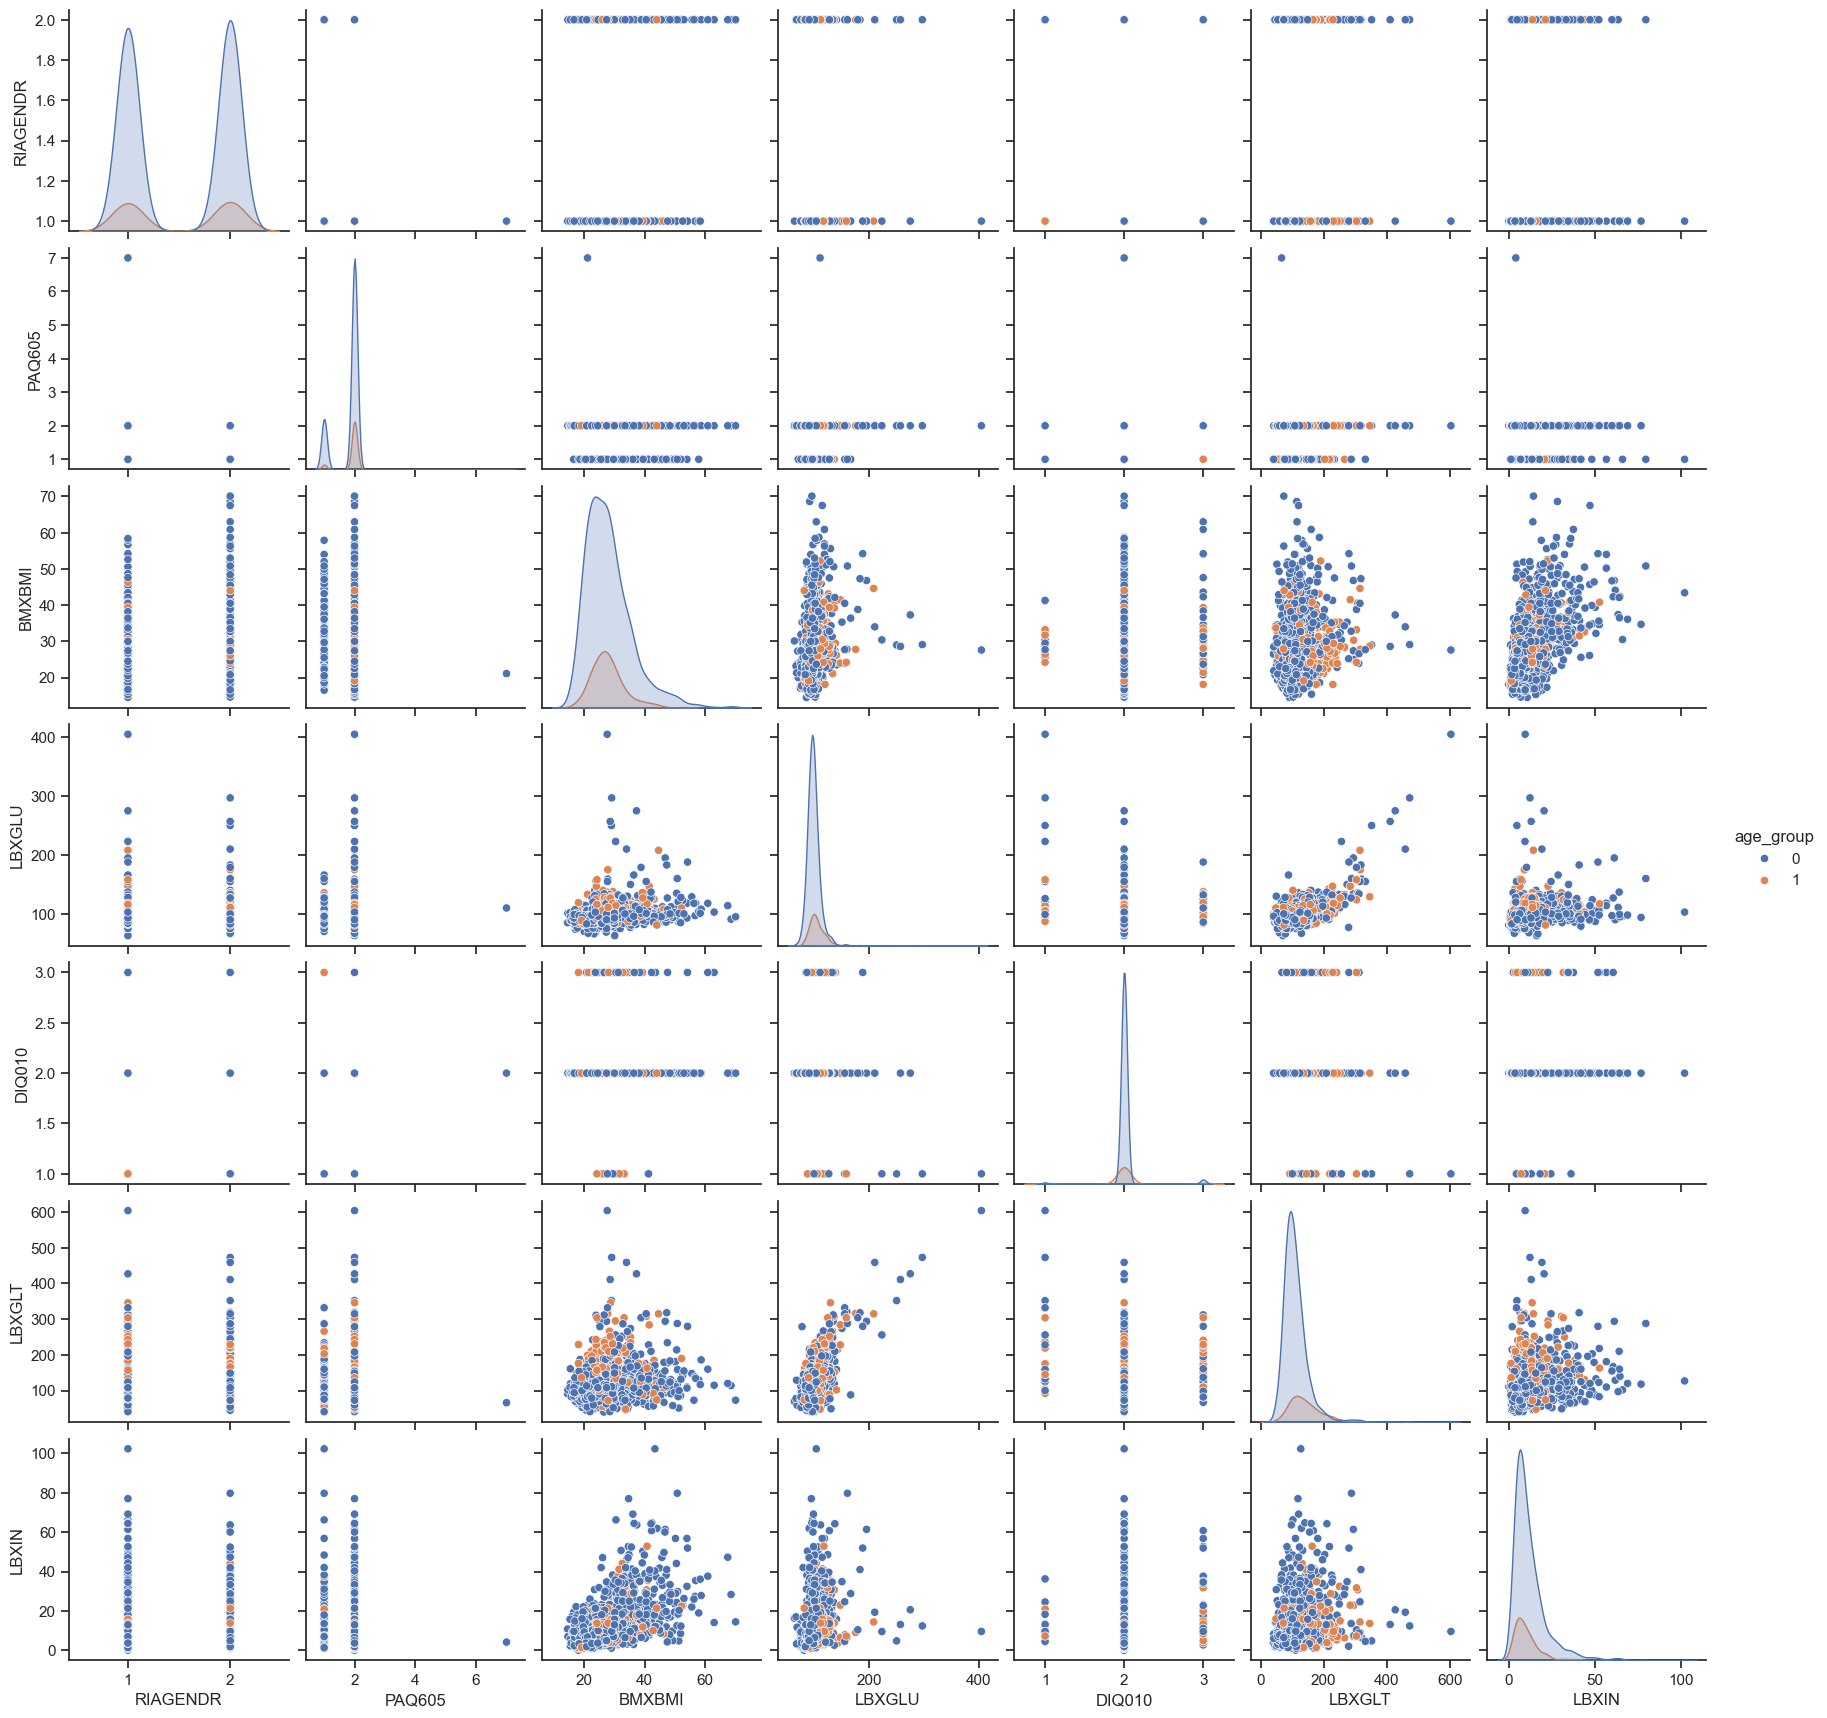

In [15]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df, hue="age_group")

In [16]:
df.age_group.value_counts()

age_group
0    1638
1     314
Name: count, dtype: int64

In [17]:
df.isna().sum()

RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group     0
dtype: int64

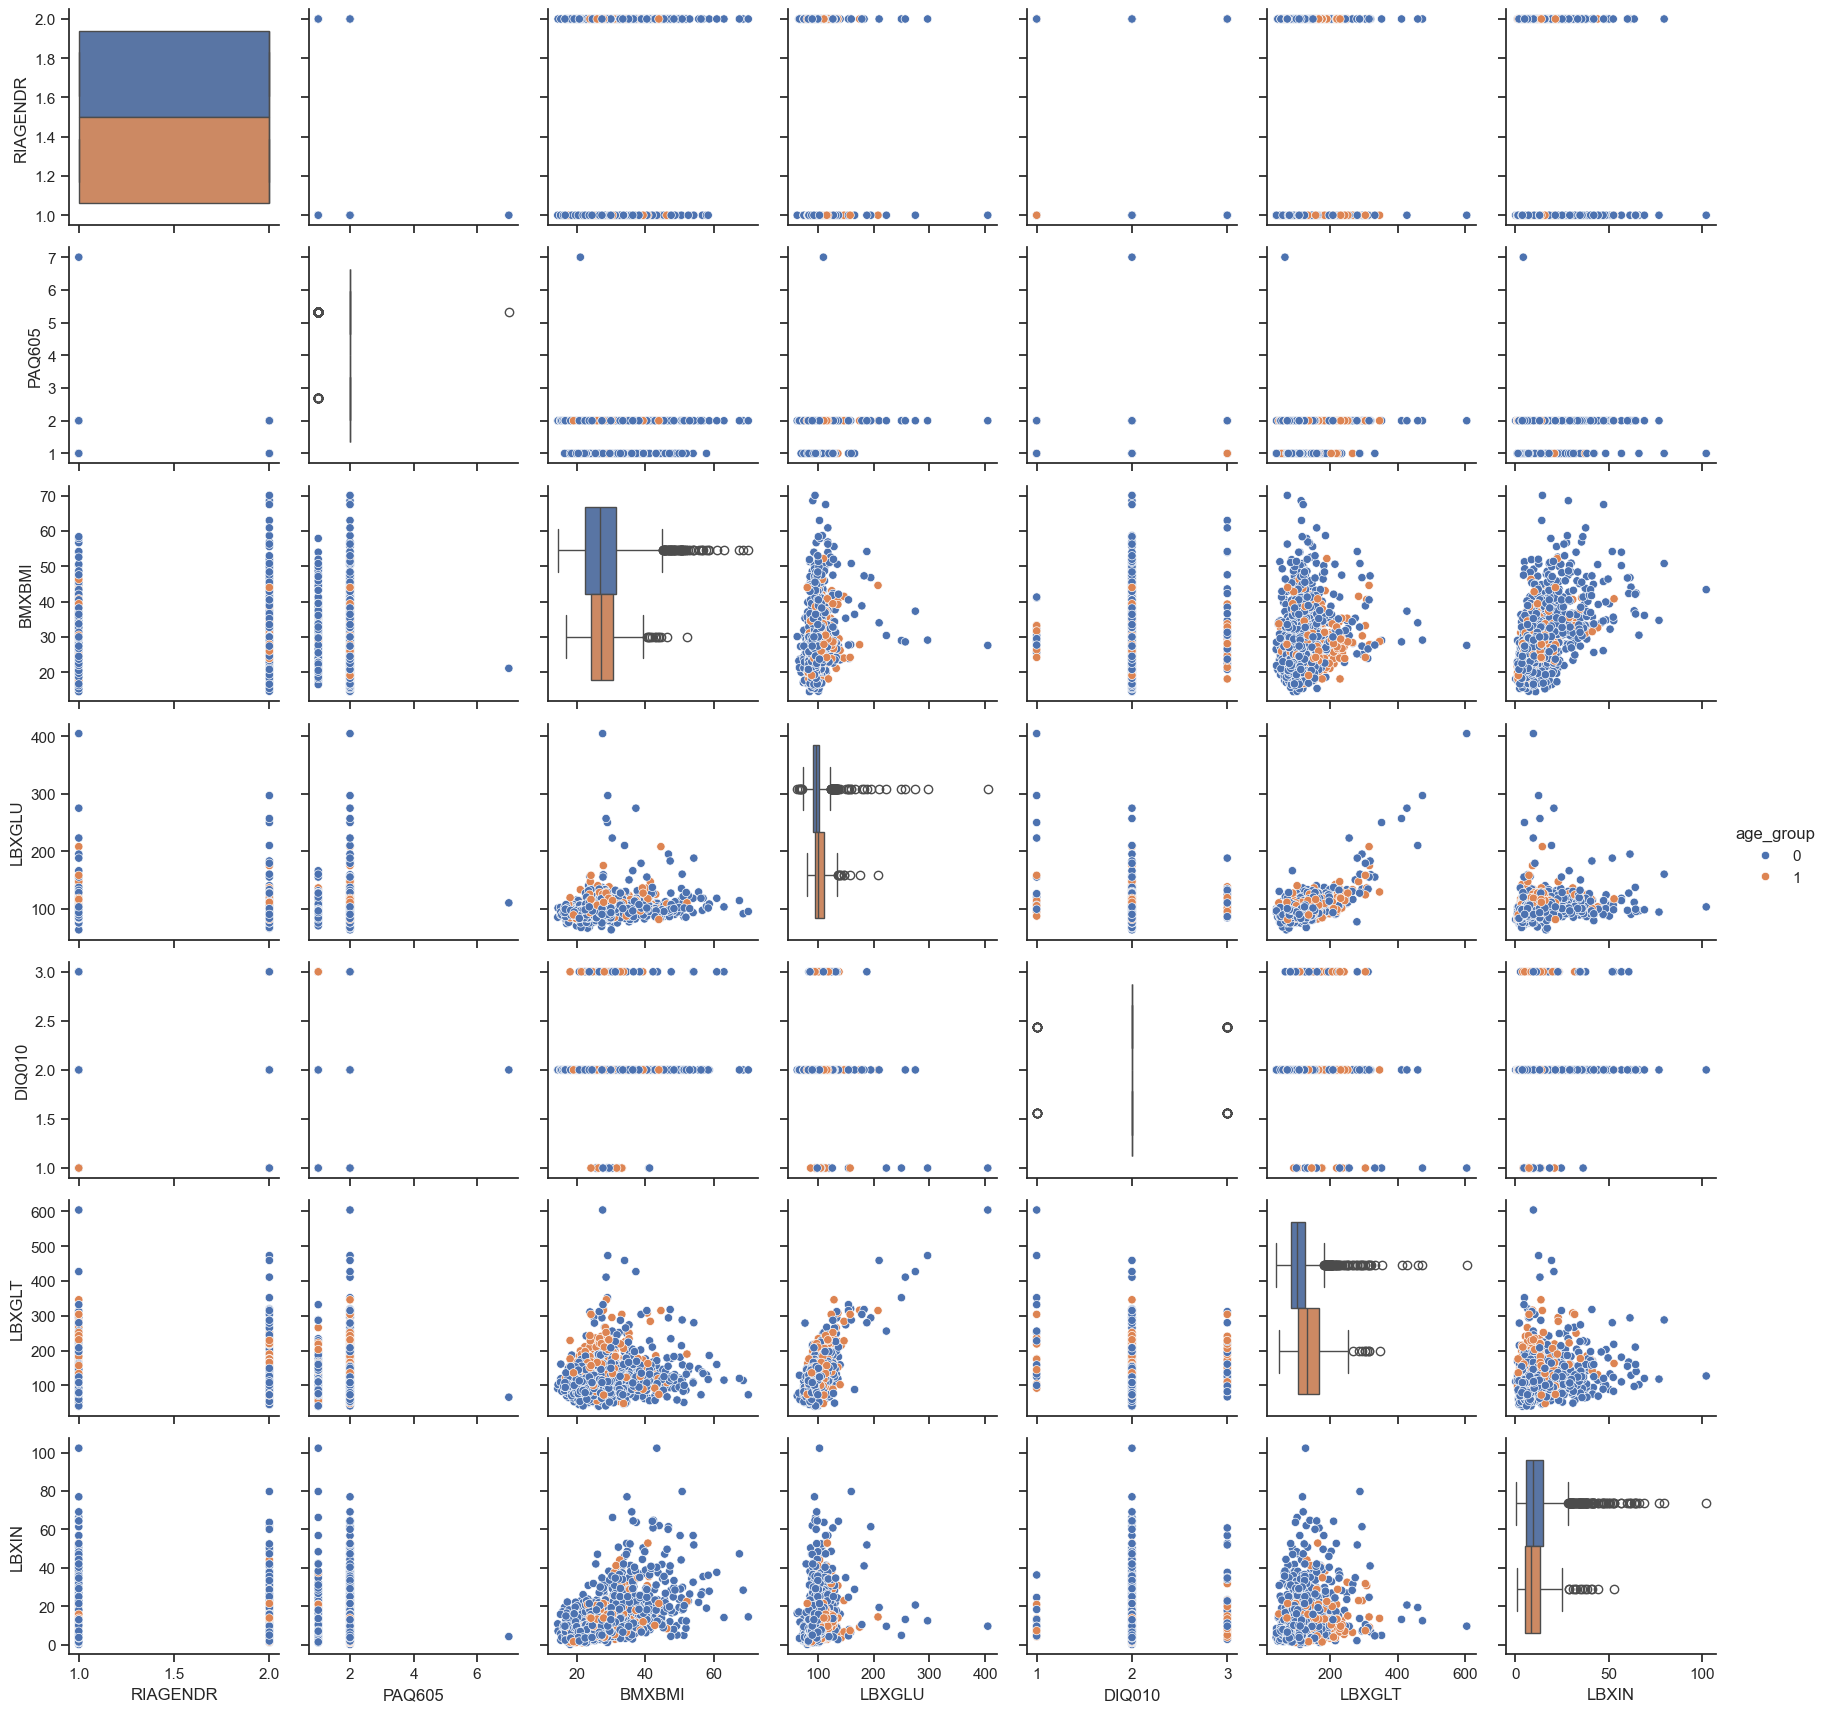

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a PairGrid
g = sns.PairGrid(df, hue="age_group")
g.map_offdiag(sns.scatterplot)   # Boxplots for off-diagonal
g.map_diag(sns.boxplot)      # Boxplots for diagonal
g.add_legend()
plt.show()


In [19]:
print(df.dropna(inplace=False).size)
print(df.size)

14816
15616


BMXBMI
Skew : 1.35


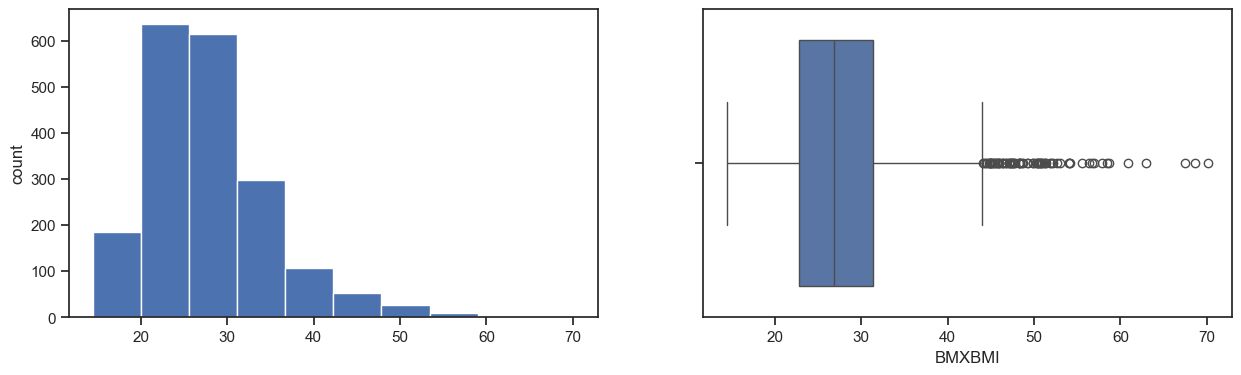

LBXGLU
Skew : 6.54


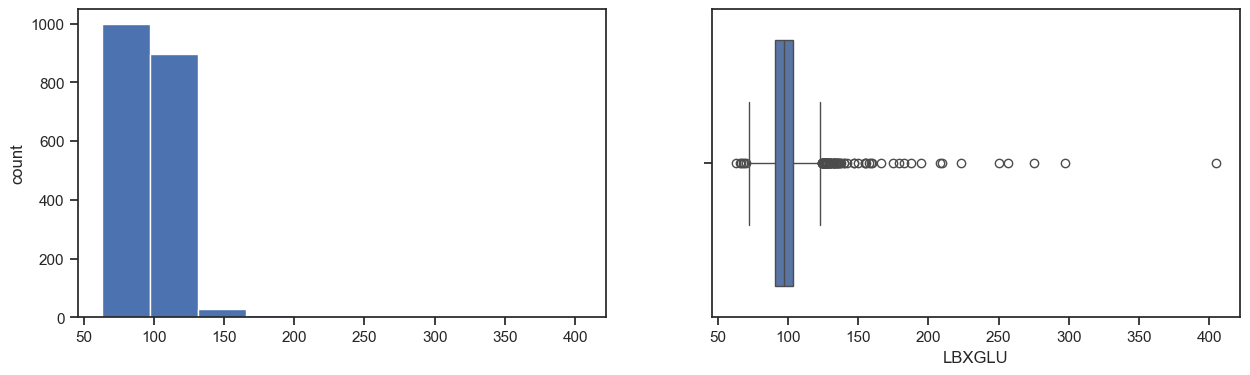

LBXGLT
Skew : 2.7


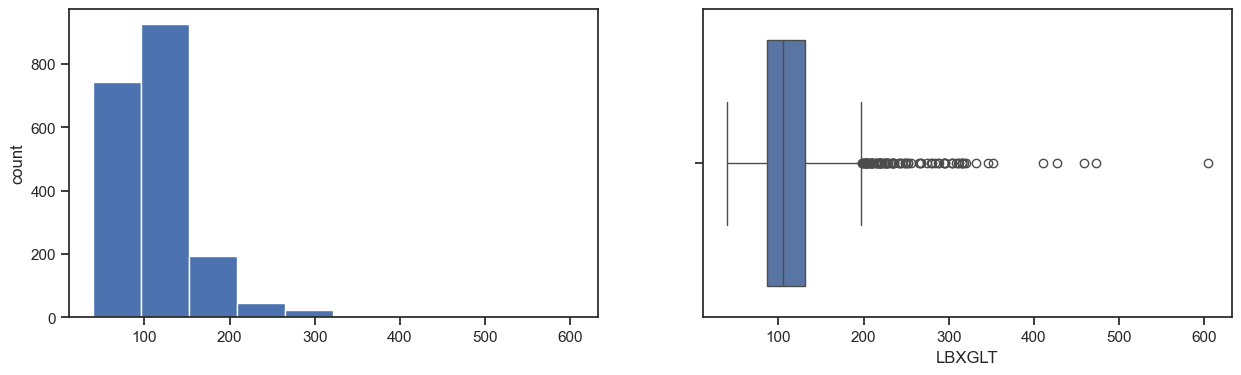

LBXIN
Skew : 2.7


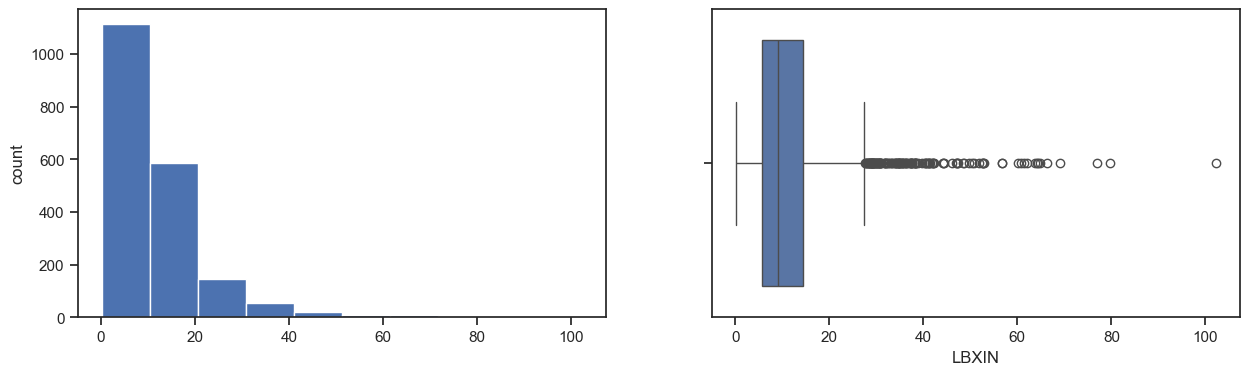

In [20]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

BMXBMI
Skew : 1.35


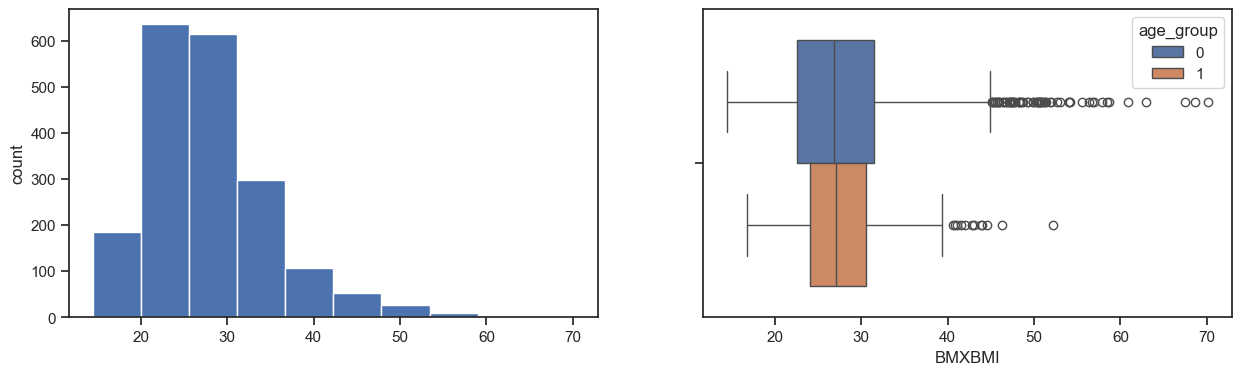

LBXGLU
Skew : 6.54


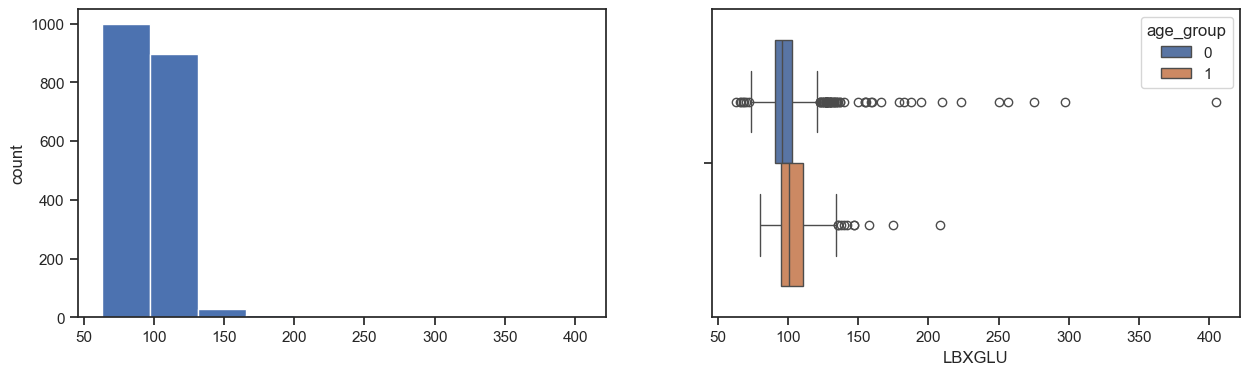

LBXGLT
Skew : 2.7


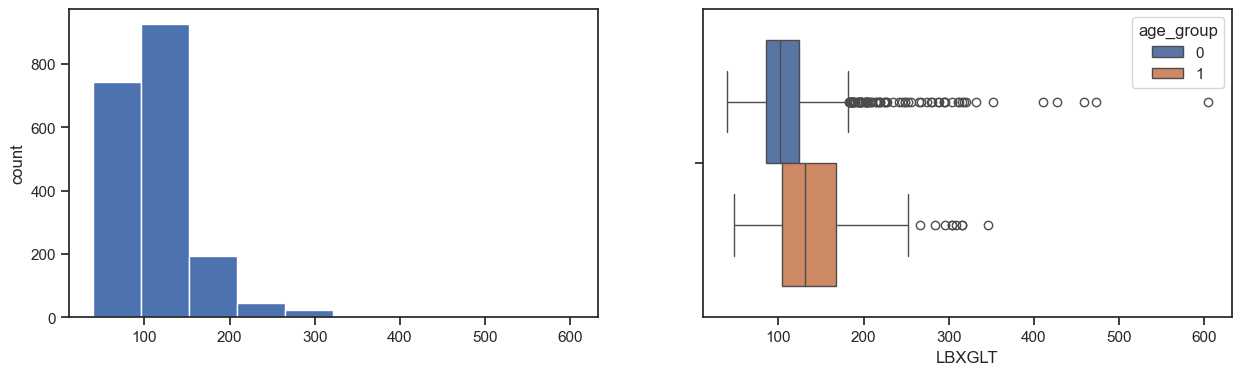

LBXIN
Skew : 2.7


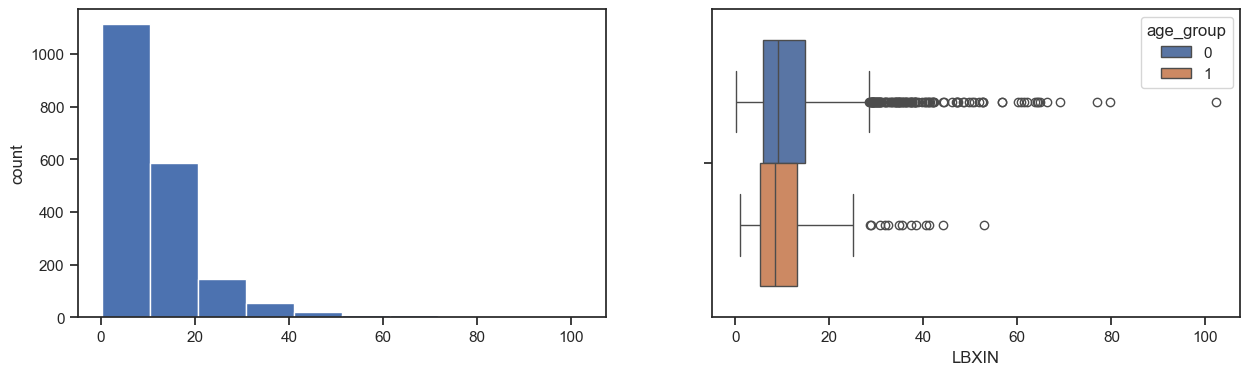

In [21]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], hue=df.age_group)
    plt.show()

# Function for log transformation of the column
def log_transform(df,col):
    for colname in col:
        if (df[colname] == 1.0).all():
            df[colname + '_log'] = np.log(df[colname]+1)
        else:
            df[colname + '_log'] = np.log(df[colname])
    df.info()

import matplotlib.pyplot as plt
import seaborn as sns

log_transform(df,['BMXBMI','LBXIN', 'LBXGLU', 'LBXGLT'])
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(df["BMXBMI"], axlabel="BMXBMI");
sns.distplot(df["LBXIN"], axlabel="LBXIN");
sns.distplot(df["LBXGLU"], axlabel="LBXGLU");
sns.distplot(df["LBXGLT"], axlabel="LBXGLT");
'''
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df['BMXBMI_log'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Log-Transformed BMXBMI')

sns.histplot(df['LBXIN_log'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Log-Transformed LBXIN')

sns.histplot(df['LBXGLU_log'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Log-Transformed LBXGLU')

sns.histplot(df['LBXGLT_log'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Log-Transformed LBXGLT')

plt.tight_layout()
plt.show()
'''

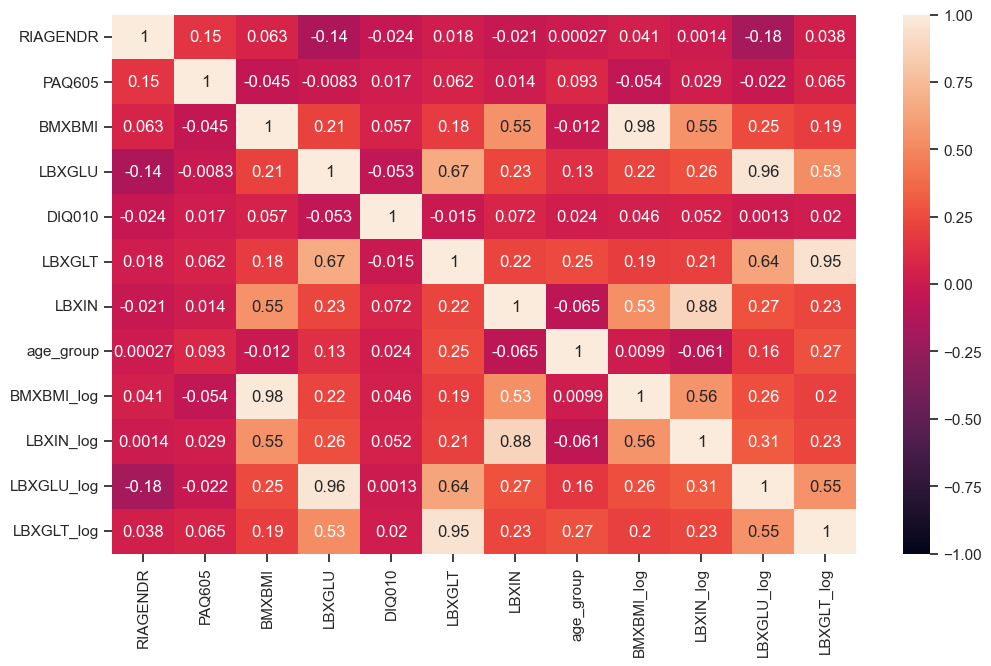

In [24]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [25]:
#Sklearn imports

# for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# to split and standarize the datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate models
from sklearn.metrics import roc_auc_score

X = df.drop(columns="age_group")
y = df["age_group"].dropna()
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
X_train.shape, X_test.shape

#df.drop(columns="SEQN", inplace=True)

((1366, 11), (586, 11))

In [ ]:
from sklearn.impute import KNNImputer

#from sklearn.impute import SimpleImputer
knn = KNNImputer(n_neighbors=20)
X_imputed = knn.fit_transform(X)
X_train_imputed = knn.fit_transform(X_train)
X_test_imputed = knn.transform(X_test)

In [35]:
lr = LogisticRegression()
lr.fit(X_train_imputed, y_train)
lr.score(X_test_imputed, y_test)

0.837173579109063

In [37]:
svm = SVC()
svm.fit(X_train_imputed, y_train)
svm.score(X_test_imputed, y_test)

0.8387096774193549

In [39]:
rf = RandomForestClassifier(n_estimators=37)
rf.fit(X_train_imputed, y_train)
rf.score(X_test_imputed, y_test)

0.82642089093702

In [41]:
'''
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf
'''

KFold(n_splits=3, random_state=None, shuffle=False)

In [43]:
'''

def get_score(model, X_train_imputed, X_test_imputed, y_train, y_test):
    model.fit(X_train_imputed, y_train)
    return model.score(X_test_imputed, y_test)

'''

In [51]:
'''
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(X_imputed, y):
    # Use .iloc for row indexing
    X_train, X_test = X_imputed.iloc[train_index], X_imputed.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear', multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))
'''

"\nfrom sklearn.model_selection import StratifiedKFold\nfolds = StratifiedKFold(n_splits=3)\n\nscores_logistic = []\nscores_svm = []\nscores_rf = []\n\nfor train_index, test_index in folds.split(X_imputed, y):\n    # Use .iloc for row indexing\n    X_train, X_test = X_imputed.iloc[train_index], X_imputed.iloc[test_index]\n    y_train, y_test = y.iloc[train_index], y.iloc[test_index]\n    \n    scores_logistic.append(get_score(LogisticRegression(solver='liblinear', multi_class='ovr'), X_train, X_test, y_train, y_test))  \n    scores_scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))\n    scores_scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))\n"

In [82]:
test = pd.read_csv("Test_Data.csv")
test_imputed = knn.fit_transform(test)
preds_test = svm.predict(test_imputed)

# Save predictions in format used for competition scoring
output = pd.DataFrame({'age_group': preds_test})
output.to_csv('submission.csv', index=False)

ValueError: X has 8 features, but SVC is expecting 11 features as input.

In [86]:

X = df.drop(columns=["age_group", "BMXBMI_log", "LBXGLT_log", "LBXGLU_log", "LBXIN_log", "SEQN"])
y = df["age_group"].dropna()

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

#df.drop(columns="SEQN", inplace=True) # If 'SEQN' exists and needs to be dropped from df before X is created, do it before X=df.drop...

from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=20)

# Fit KNNImputer ONLY on the training data (X_train)
X_train_imputed = knn.fit_transform(X_train)
X_test_imputed = knn.transform(X_test) # Transform X_test using the *fitted* imputer

svm = SVC()
svm.fit(X_train_imputed, y_train)
print(f"SVM score on test data: {svm.score(X_test_imputed, y_test)}")


# For your Test_Data.csv:
test = pd.read_csv("Test_Data.csv")

# IMPORTANT: Ensure 'test' has the same columns as 'X' before imputation.
# If 'Test_Data.csv' is missing columns present in 'X' (other than 'age_group'),
# you will need to add those columns to 'test' (e.g., with NaNs)
# or drop columns from 'X' that are not in 'test' if they are irrelevant.
# If 'SEQN' was dropped from 'df' to create 'X', make sure it's also handled in 'test' if present.
# Example: if 'SEQN' is in 'test' and not used for training:
if 'SEQN' in test.columns:
    test_for_imputation = test.drop(columns=['SEQN'])
else:
    test_for_imputation = test.copy()


# Use the *already fitted* knn imputer to transform the new test data
test_imputed = knn.transform(test_for_imputation) # Use transform, NOT fit_transform

preds_test = svm.predict(test_imputed)

# Save predictions in format used for competition scoring
output = pd.DataFrame({'age_group': preds_test})
output.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' created successfully.")

SVM score on test data: 0.8549488054607508
Submission file 'submission.csv' created successfully.
